In [38]:
import pandas as pd

tracks = pd.read_csv("C:/Data/fma_metadata/tracks_normalizedheader.csv", header=0)

tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [24]:
tracks[["artist_name", "track_title"]]

,artist_name,track_title
0,AWOL,Food
1,AWOL,Electric Ave
2,AWOL,This World
3,Kurt Vile,Freeway
4,Nicky Cook,Spiritual Level
...,...,...
106569,Spowder,The Auger
106570,Spowder,Let's Skin Ruby
106571,Spowder,My House Smells Like Kim Deal/Pulp
106572,Spowder,The Man With Two Mouths


In [118]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

client_credentials_manager = SpotifyClientCredentials(client_id="701987a8ef3e4e59902c8fb7462a3079", client_secret="f5fc28ab1042458687a7d38fd93ba0a4")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

search_str = 'track:Let''s Skin Ruby artist:Spowder'
result = sp.search(search_str, type='track')
pprint.pprint(result)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=track%3ALets+Skin+Ruby+artist%3ASpowder&type=track&offset=0&limit=10',
            'items': [{'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3ixhHqORIM3EWaavfPzbFb'},
                                              'href': 'https://api.spotify.com/v1/artists/3ixhHqORIM3EWaavfPzbFb',
                                              'id': '3ixhHqORIM3EWaavfPzbFb',
                                              'name': 'Spowder',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:3ixhHqORIM3EWaavfPzbFb'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AR',
                                                       'AT',
                

In [64]:
tracks_in_spotify = pd.DataFrame(data= {'track_id': [-1], 'spotify_id': ["test"], 'popularity': [-1]})

In [182]:
tracks_in_spotify = tracks_in_spotify[:0]

In [104]:
tracks_loaded = tracks_loaded.append(pd.DataFrame([[99999]]))
tracks_loaded = tracks_loaded[:0]

In [171]:
for index, row in tracks.iterrows():
    track_id = row['track_id']
    if pd.isnull(tracks_loaded.where(tracks_loaded == track_id).max()).max():
        search_str = 'track:' + str(row['track_title']) + ' artist:' + str(row['artist_name'])
        result = sp.search(search_str, type='track')
        if result["tracks"]["total"] > 0:
            spotify_id = result["tracks"]["items"][0]["id"]
            popularity = result["tracks"]["items"][0]["popularity"]
            tracks_in_spotify = tracks_in_spotify.append(pd.DataFrame([[track_id, spotify_id, popularity]], columns=["track_id", "spotify_id", "popularity"]))
        tracks_loaded = tracks_loaded.append(pd.DataFrame([[track_id]]))

In [172]:
tracks_in_spotify["popularity"].describe()

count    23110.000000
mean         3.261489
std          7.194608
min         -1.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         70.000000
Name: popularity, dtype: float64

In [203]:
tracks_in_spotify.to_csv("C:/Data/tracksinspotify.csv")

In [204]:
tracks_in_spotify[tracks_in_spotify["popularity"] > 40].count()

track_id      116
spotify_id    116
popularity    116
dtype: int64

(array([5.669e+03, 1.536e+03, 8.150e+02, 3.700e+02, 3.020e+02, 1.170e+02,
        6.500e+01, 2.000e+01, 5.000e+00, 4.000e+00]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <a list of 10 Patch objects>)

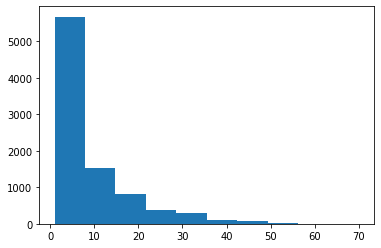

In [209]:
import matplotlib.pyplot as plt
plt.hist(tracks_in_spotify[tracks_in_spotify["popularity"] > 0]["popularity"])